# 1. Loading  Datasets

In [6]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Users/mark/GoogleDrive/UM/S4/GEMS/Git/SEMB_env/bin/python3
3.6.2 (v3.6.2:5fd33b5926, Jul 16 2017, 20:11:06) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)


In [7]:
from semb.datasets import load as load_dataset
from semb.datasets import get_dataset_ids
for did in get_dataset_ids():
    print(did)
    load_dataset(did)

Synthetic_Regular
BlogCatalog
ICEWS
Facebook
Synthetic_Role
DD6
PPI
airports


These are the `dataset_id` for the existing datasets.

## 1.1 Load Specific Dataset

### Load Built-in Dataset (Graph)

In [8]:
# Get airports datasets
DataProvider = load_dataset("airports")
Datasets = DataProvider().get_datasets()

`Datasets` contain all the datasets with the identifier `airports`

In [9]:
Datasets

[DatasetInfo(name='0 - brazil', description='Brazil airport sample data', src_url='/Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/datasets/airports/../../../sample-data/Airports/airport_Brazil/brazil-airports.edgelist', label_url='/Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/datasets/airports/../../../sample-data/Airports/airport_Brazil/airport_Brazil_label.txt'),
 DatasetInfo(name='1 - european', description='European airport sample data', src_url='/Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/datasets/airports/../../../sample-data/Airports/airport_European/europe-airports.edgelist', label_url='/Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/datasets/airports/../../../sample-data/Airports/airport_European/airport_European_label.txt'),
 DatasetInfo(name='2 - US', description='European airport sample data', src_url='/Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/datasets/airports/../../../sa

For example, to get the Br-Air traffic dataset, which is the first in the Datasets list. 

In [10]:
dataset_graph = DataProvider().load_dataset(Datasets[0])

The loaded graph will have the type of `networkx.Graph()`

In [11]:
dataset_graph

### Load Built-in Dataset (Graph)

If the built-in dataset contains the corresponding label, call the `load_label()` function to get the label.

In [12]:
dataset_label = DataProvider().load_label(Datasets[0])

Read in 131 node labels.
>>> Label 0 appears 32 times
>>> Label 1 appears 32 times
>>> Label 3 appears 35 times
>>> Label 2 appears 32 times


## 1.2 Load Customized Dataset

### 1.2.1 Load Customized Dataset (Graph)

SEMB is compatible with all the *undirected, unweighted* `networkx.Graph()` data as input

### 1.2.2 Load Customized Dataset (Label)

Call the `get_label(input_dir, delimeter)` function to load customized label file. Please make sure each line of the label file aligns with the following format.

\<Node_id(int)\> \<delimeter\> \<Label_id(int)\>

The default delimeter is blank.

In [7]:
from semb.evaluations.utils import *

In [8]:
dict_customized_labels = \
get_label("./sample-data/labels/airport_Brazil_log_label.txt")

Read in 131 node labels.
>>> Label 2 appears 31 times
>>> Label 1 appears 81 times
>>> Label 0 appears 19 times


# 2. Load Embedding Methods

In [10]:
from semb.methods import load as load_method
from semb.methods import get_method_ids
for mid in get_method_ids():
    print(mid)
    load_method(mid)

graphwave
degree2
drne
node2vec
degree
gae
role2vec
line
degree1
struc2vec
xnetmf
multilens
segk
riwalk


These are the `method_id` for the existing datasets.

## 2.1 Load Specific Embedding Method

In [11]:
EmbMethodClassXnetmf = load_method("xnetmf")

Show the tunable parameters of the xNetMF method

In [12]:
EmbMethodClassXnetmf.__PARAMS__

{'dim': 128, 'max_layer': 2, 'discount': 0.1, 'gamma': 1}

# 3. Get Embedding

## 3.1 Embedding with xNetMF

Initialize the embedding method with i) the target graph to embed 2)the tunable parameters.

In [13]:
xnetmf = EmbMethodClassXnetmf(dataset_graph,
                              dim = 128,
                              max_layer = 2,
                              discount = 0.1,
                              gamma = 1)

Call the `train()` function to start the embedding process.

In [14]:
xnetmf.train()

max degree:  80
got k hop neighbors in time:  0.04764890670776367
got degree sequences in time:  0.012601137161254883
computed representation in time:  0.008405923843383789


Call the `get_embeddings()` function to get the embedding file.

In [15]:
dict_xnetmf_emb = xnetmf.get_embeddings()

## 3.2 Embedding with struc2vec

In [16]:
EmbMethodClass = load_method("struc2vec")
EmbMethodClass.__PARAMS__

{'dim': 128,
 'walk_length': 80,
 'num_walks': 10,
 'window_size': 10,
 'until_layer': None,
 'iter': 5,
 'workers': 1,
 'weighted': False,
 'directed': False,
 'opt1': False,
 'opt2': False,
 'opt3': False}

In [17]:
struc2vec = EmbMethodClass(dataset_graph, 
                           num_walks=10, 
                           walk_length=80, 
                           window_size=10, 
                           dim=128, 
                           opt1=True, opt2=True, opt3=True, until_layer=2)
struc2vec.train()
dict_struc2vec_emb = struc2vec.get_embeddings()

rm /Users/mark/GoogleDrive/UM/S4/GEMS/Git/StrucEmbeddingLibrary/semb/methods/struc2vec/pickles/weights_distances-layer-*.pickle


## 3.3 Embedding with node2vec

In [18]:
EmbMethodClass = load_method("node2vec")
EmbMethodClass.__PARAMS__

{'dim': 128,
 'walk_length': 80,
 'num_walks': 10,
 'window_size': 10,
 'iter': 1,
 'workers': 1,
 'p': 1,
 'q': 1,
 'weighted': False,
 'directed': False}

In [19]:
node2vec = EmbMethodClass(dataset_graph, p=1, q=4, iter=5)
node2vec.train()
dict_node2vec_emb = node2vec.get_embeddings()

# 4. Classification and Clustering Evaluation

In [20]:
from semb.evaluations.classification import *
from semb.evaluations.clustering import *
from semb.evaluations.utils import *

## 4.1 Classification 

### 4.1.1 Perform Classification

Call the `perform_classification(dict_emb, dict_label)` function to perform classification.

In [21]:
dict_xnetmf_classification = \
perform_classification(dict_xnetmf_emb, dataset_label)

In [22]:
dict_xnetmf_classification

{'overall': {'accuracy': {'mean': 0.7026, 'std': 0.0771},
  'f1_macro': {'mean': 0.6841, 'std': 0.0785},
  'f1_micro': {'mean': 0.7026, 'std': 0.0771},
  'auc_micro': {'mean': 0.9022, 'std': 0.0462},
  'auc_macro': {'mean': 0.9098, 'std': 0.0466}},
 'detailed': {0: {'accuracy': 0.6667,
   'f1_macro': 0.6293,
   'f1_micro': 0.6667,
   'auc_micro': 0.8989,
   'auc_macro': 0.896},
  1: {'accuracy': 0.5769,
   'f1_macro': 0.5673,
   'f1_micro': 0.5769,
   'auc_micro': 0.822,
   'auc_macro': 0.8317},
  2: {'accuracy': 0.8077,
   'f1_macro': 0.7939,
   'f1_micro': 0.8077,
   'auc_micro': 0.9591,
   'auc_macro': 0.9641},
  3: {'accuracy': 0.7308,
   'f1_macro': 0.7049,
   'f1_micro': 0.7308,
   'auc_micro': 0.9334,
   'auc_macro': 0.9499},
  4: {'accuracy': 0.7308,
   'f1_macro': 0.725,
   'f1_micro': 0.7308,
   'auc_micro': 0.8974,
   'auc_macro': 0.9073}}}

In [23]:
dict_struc2vec_classification = \
perform_classification(dict_struc2vec_emb, dataset_label)

In [24]:
dict_node2vec_classification = \
perform_classification(dict_node2vec_emb, dataset_label)

### 4.1.2 Show Results in a Concatenated Table

In [25]:
concatenate_result_pd([("xnetmf", dict_xnetmf_classification), 
                       ("struc2vec", dict_struc2vec_classification),
                       ("node2vec", dict_node2vec_classification)])

,methods,accuracy_mean,accuracy_std,f1_macro_mean,f1_macro_std,f1_micro_mean,f1_micro_std,auc_micro_mean,auc_micro_std,auc_macro_mean,auc_macro_std
0,xnetmf,0.7026,0.0771,0.6841,0.0785,0.7026,0.0771,0.9022,0.0462,0.9098,0.0466
1,struc2vec,0.7860,0.0676,0.7809,0.0675,0.7860,0.0676,0.9193,0.0261,0.9318,0.0148
2,node2vec,0.3587,0.0706,0.3229,0.0644,0.3587,0.0706,0.5931,0.0316,0.5678,0.0338


### 4.1.3 Bar-plot Visualization for Classification

In [26]:
from semb.evaluations.visualization import *

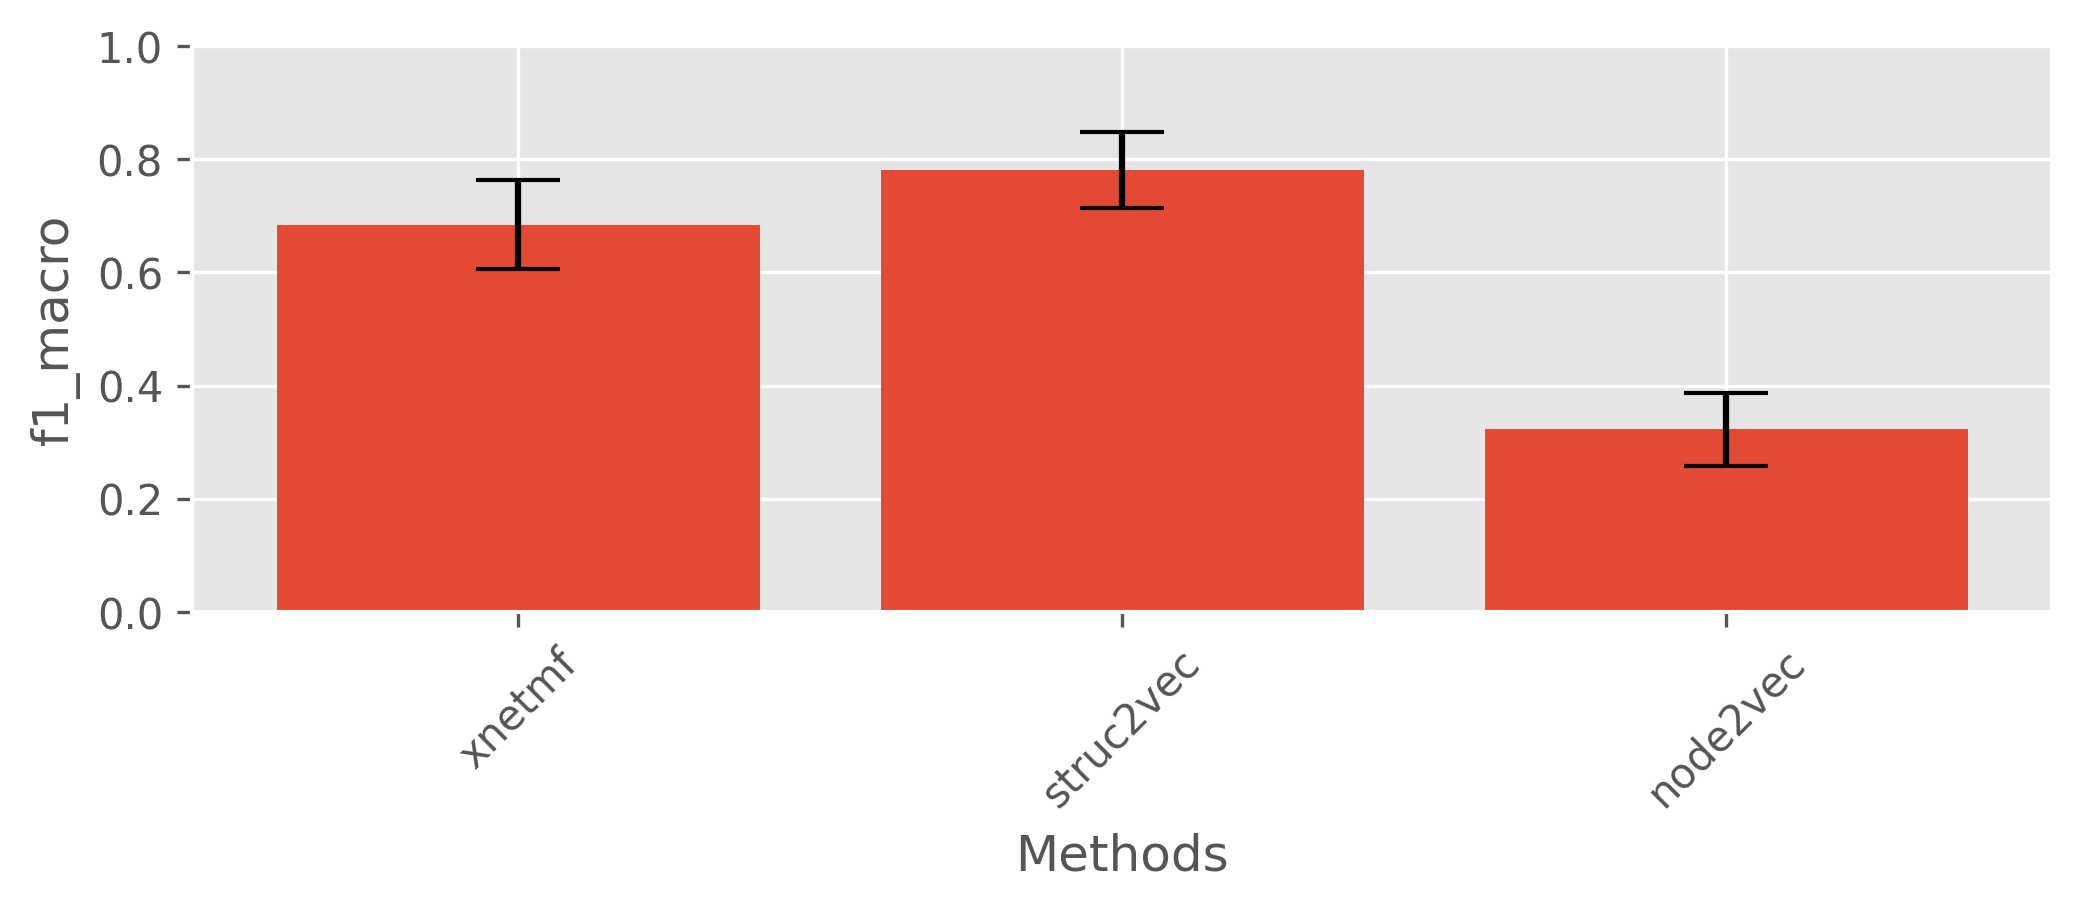

In [27]:
visualize_classification([("xnetmf", dict_xnetmf_classification), 
                          ("struc2vec", dict_struc2vec_classification),
                          ("node2vec", dict_node2vec_classification)],
                         metric='f1_macro', error_bar=True, rotation_deg=45 )

## 4.2 Clustering

## 4.2.1 Perform Clustering

Call the `perform_classification(dict_emb, dict_label)` function to perform classification.

In [28]:
dict_xnetmf_clustering = \
perform_clustering(dict_xnetmf_emb, dataset_label)

/Users/mark/GoogleDrive/UM/S4/GEMS/Git/SEMB_env/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [29]:
dict_xnetmf_clustering

{'overall': {'purity': 0.45038167938931295, 'nmi': 0.24750668135395176}}

In [30]:
dict_struc2vec_clustering = \
perform_clustering(dict_struc2vec_emb, dataset_label)

/Users/mark/GoogleDrive/UM/S4/GEMS/Git/SEMB_env/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [31]:
dict_node2vec_clustering = \
perform_clustering(dict_node2vec_emb, dataset_label)

/Users/mark/GoogleDrive/UM/S4/GEMS/Git/SEMB_env/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


### 4.2.2 Show Results in a Concatenated Table

In [32]:
concatenate_result_pd([("xnetmf", dict_xnetmf_clustering), 
                       ("struc2vec", dict_struc2vec_clustering),
                       ("node2vec", dict_node2vec_clustering)])

,methods,purity,nmi
0,xnetmf,0.450382,0.247507
1,struc2vec,0.656489,0.458403
2,node2vec,0.343511,0.074570


### 4.2.3 Bar-plot Visualization for Clustering

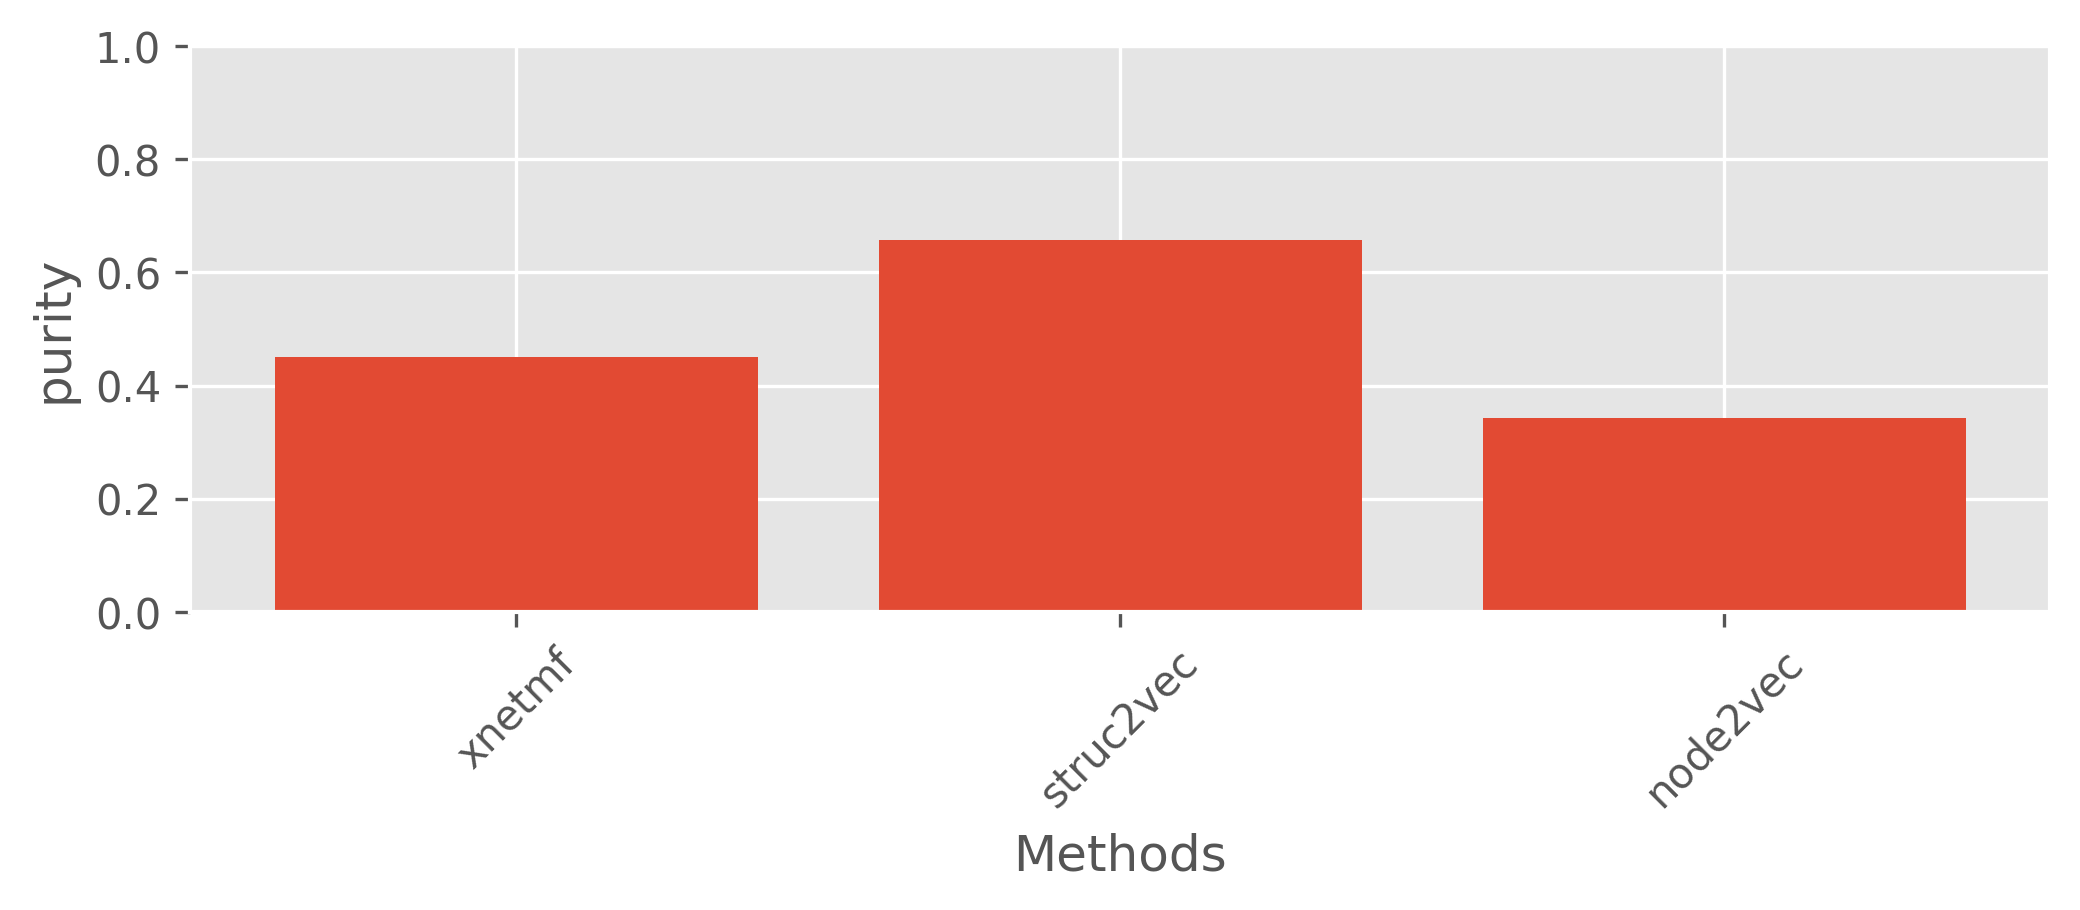

In [33]:
visualize_clustering([("xnetmf", dict_xnetmf_clustering), 
                      ("struc2vec", dict_struc2vec_clustering),
                      ("node2vec", dict_node2vec_clustering)],
                    metric='purity', rotation_deg=45)

# 5. Perform Centrality Correlation Evaluation

In [34]:
from semb.evaluations.centrality_correlation import *

In [35]:
centrality_correlation(dataset_graph, 
                       dict_struc2vec_emb, 
                       centrality='clustering_coeff', 
                       similarity='euclidean')

0.9420771391553502

In [36]:
centrality_correlation(dataset_graph, 
                       dict_node2vec_emb, 
                       centrality='pagerank', 
                       similarity='cosine')

0.3938822195894267

In [37]:
centrality_correlation(dataset_graph, 
                       dict_xnetmf_emb, 
                       centrality='degree', 
                       similarity='euclidean')

0.8457912846571526